In [140]:
import pandas as pd

df = pd.read_csv('/content/user_data.csv')
df.head()

,Timestamp,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal
0,25/10/2024 10:10:08,24-26,Female,FAS,4th year,More than 8 hours,Never,"Traditional Sri Lankan food, Processed foods (...",2-3 times a week,No specific diet,Dryfish,40 - 49 kg,157cm,Gastritis,"More than 3,000 LKR",Daily,"Rice and curry, Hoppers",Better health
1,25/10/2024 10:19:28,24-26,Male,FAS,4th year,6-8 hours,1-2 times per week,Traditional Sri Lankan food,Never,No specific diet,NaN,80 - 89 kg,172cm,High cholesterol,"2,000 - 3,000 LKR",Daily,"Rice and curry, String hoppers",Manage health conditions
2,25/10/2024 14:30:21,24-26,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,NaN,50 - 59 kg,144cm,Gastritis,"1,000 - 2,000 LKR",Rarely/Never,"Rice and curry, Hoppers, Roti",Better health
3,25/10/2024 14:35:40,24-26,Male,FLFN,4th year,More than 8 hours,1-2 times per week,"Traditional Sri Lankan food, Fast food (e.g., ...",2-3 times a week,No specific diet,NaN,50 - 59 kg,175cm,NaN,"2,000 - 3,000 LKR",Daily,"Rice and curry, String hoppers, Kottu, Hoppers...",Better health
4,25/10/2024 14:59:37,24-26,Female,FLFN,4th year,6-8 hours,Never,"Traditional Sri Lankan food, Fruits and vegeta...",Once a week,No specific diet,NaN,40 - 49 kg,160cm,NaN,"2,000 - 3,000 LKR",Daily,"Rice and curry, Hoppers, Roti",Improve energy levels


In [141]:
# Drop the specific column
df = df.drop(columns=['Timestamp'])

In [142]:
df.describe()

,Age,Gender,Faculty,Year of study,Sleep(night),Exercise frequency,Frequent food,Fast food consumption frequency,Diet type,Food allergies,Weight,Height,Health conditions,Weekly spend for food,University canteen usage,Preferred Sri Lankan foods,Diet goal
count,565,565,565,565,565,565,565,565,565,313,565,565,352,565,565,565,565
unique,5,2,6,5,4,5,222,5,6,22,8,87,8,4,5,261,6
top,24-26,Male,FAS,4th year,5-6 hours,1-2 times per week,Traditional Sri Lankan food,2-3 times a week,No specific diet,Gluten,50 - 59 kg,157,Gastritis,"2,000 - 3,000 LKR",Daily,Rice and curry,Better health
freq,221,288,179,185,190,155,111,174,295,81,149,77,159,172,221,80,209


In [143]:
# Check for missing values
df.isnull().sum()


,0
Age,1
Gender,1
Faculty,1
Year of study,1
Sleep(night),1
Exercise frequency,1
Frequent food,1
Fast food consumption frequency,1
Diet type,1
Food allergies,253


In [144]:
#fill with none
df["Food allergies"] = df["Food allergies"].fillna("None")


In [145]:
#fill with none
df["Health conditions"] = df["Health conditions"].fillna("None")


In [146]:
# Fill missing values with mode (most frequent value)
df.fillna(df.mode().iloc[0], inplace=True)


In [147]:
# Check for missing values
df.isnull().sum()


,0
Age,0
Gender,0
Faculty,0
Year of study,0
Sleep(night),0
Exercise frequency,0
Frequent food,0
Fast food consumption frequency,0
Diet type,0
Food allergies,0


In [148]:
# Categorical columns to encode
# One-hot encode categorical columns
df = pd.get_dummies(df, columns=[

    "Gender",
    "Faculty",
    "Year of study",
    "Sleep(night)",
    "Exercise frequency",
    "Frequent food",
    "Fast food consumption frequency",
    "Diet type",
    "Food allergies",
    "Health conditions",
    "University canteen usage",
    "Preferred Sri Lankan foods",
    "Diet goal"
],drop_first=True)

# View the result
print(df_encoded.head())


   Age  Weight  Height  Weekly spend for food  Gender_Male  Faculty_FAPM  \
0  NaN    44.5   157.0                 3500.0        False         False   
1  NaN    84.5   172.0                 2500.0         True         False   
2  NaN    54.5   144.0                 1500.0        False         False   
3  NaN    54.5   175.0                 2500.0         True         False   
4  NaN    44.5   160.0                 2500.0        False         False   

   Faculty_FAS  Faculty_FLFN  Faculty_FOM  Faculty_FOT  ...  \
0         True         False        False        False  ...   
1         True         False        False        False  ...   
2        False          True        False        False  ...   
3        False          True        False        False  ...   
4        False          True        False        False  ...   

   Preferred Sri Lnakan foods_String hoppers  \
0                                      False   
1                                      False   
2                   

In [149]:
print(df_encoded.shape)
print(df_encoded.columns)


(566, 569)
Index(['Age', 'Weight', 'Height', 'Weekly spend for food', 'Gender_Male',
       'Faculty_FAPM', 'Faculty_FAS', 'Faculty_FLFN', 'Faculty_FOM',
       'Faculty_FOT',
       ...
       'Preferred Sri Lnakan foods_String hoppers',
       'Preferred Sri Lnakan foods_String hoppers, Hoppers',
       'Preferred Sri Lnakan foods_String hoppers, Jackfruit curry, Hoppers, Roti, Rice and curry, Kottu',
       'Preferred Sri Lnakan foods_String hoppers, Kottu',
       'Preferred Sri Lnakan foods_String hoppers, Kottu, Roti',
       'Diet goal_I have to gain weight in a healthy way',
       'Diet goal_Improve energy levels', 'Diet goal_Manage health conditions',
       'Diet goal_Sustainable diet', 'Diet goal_Weight management'],
      dtype='object', length=569)


In [150]:
# Check the unique values in the weight column
print(df['Age'].unique())


['24-26' '21-23' '27 and above' '21-23, 27 and above' '18-20']


In [151]:
# Function to convert age range to the midpoint of the range or handle special cases
def convert_age_range(age_range):
    # Convert age_range to string to handle potential float values
    age_range = str(age_range)
    if 'and above' in age_range:
        # If the age is '27 and above', we assign it the value 27 or any reasonable value
        return 27
    elif ',' in age_range:
        # Handle cases like '23, 27 and above'
        age_parts = age_range.split(',')
        # Convert the first part to the integer and handle 'and above' case in the second part
        return (int(age_parts[0]) + 27) / 2  # Use 27 as the "midpoint" for "and above"
    elif '-' in age_range:
        start, end = age_range.split('-')
        return (int(start) + int(end)) / 2
    # Handle cases with nan string and other string convertible to int
    try:
        return int(age_range) # Handle other cases like single age values (e.g., '25')
    except ValueError:
        return float('nan')  # or any suitable value for missing/invalid ages
# Apply the conversion to the 'What is your age?' column
df['Age'] = df['Age'].apply(convert_age_range)

# Check the transformed data
print(df['Age'].head())

0    25.0
1    25.0
2    25.0
3    25.0
4    25.0
Name: Age, dtype: float64


In [152]:
# Check the unique values in the weight column
print(df['Weight'].unique())


['40 - 49 kg' '80 - 89 kg' '50 - 59 kg' '60 - 69 kg' '70 - 79 kg'
 'Below 40 kg' '90 - 99 kg' '100 kg or above']


In [153]:
# Function to convert weight values to numerical midpoints or approximate values
def convert_weight(weight):
    if '-' in weight:  # For ranges like '40 - 49 kg'
        start, end = weight.replace(' kg', '').split(' - ')
        return (int(start) + int(end)) / 2
    elif 'Below' in weight:  # For 'Below 40 kg'
        return 35  # Approximate value for "Below 40 kg"
    elif 'or above' in weight:  # For '100 kg or above'
        return 105  # Approximate value for "100 kg or above"
    else:
        return float(weight.replace(' kg', ''))  # Handle direct numeric weights

# Apply the function to the 'What is your current weight?' column
df['Weight'] = df['Weight'].apply(convert_weight)

# Check the transformed weight column
print(df['Weight'].head())


0    44.5
1    84.5
2    54.5
3    54.5
4    44.5
Name: Weight, dtype: float64


In [154]:
# Check unique values in the column
print(df['Height'].unique())


['157cm' '172cm' '144cm' '175cm' '160cm' '152cm' '150cm' '177cm' '163cm'
 '154cm' '155cm' '149cm' '156cm' '168cm' '161cm' '164 cm' '170cm' '178 cm'
 '162cm' '175' '176' '160' '158 CM' '153 cm' '170' '156' '174' '165' '164'
 '161 cm' '152.4' '148' '164cm' '152' '154' '180' '160 cm' '130cm' '170.6'
 '157' '173' '152 cm ' '154 cm' '166cm' '172' '165cm' '187' '150' '162'
 '155' '152 cm' '167' '163 cm' '159' '153' '158cm' '169' '168' '151 cm'
 '178' '151cm' '146' '173 cm' '150 cm' '176cm' '185' '148 cm' '163'
 '178cm' '146 cm' '167cm' '156cm ' '179' '189' '176 cm' '156 cm' '158'
 '169.5' '167.64' '174m' '171cm' '177' '149' '140cm' '168 cm' '183' '147']


In [155]:
# Function to clean the height column and convert it to numeric (in cm)
import re # Import the 're' module

def clean_height(height):
    # Remove any non-numeric characters (e.g., cm, CM, spaces)
    height_cleaned = re.sub(r"[^\d.]", "", height)
    return float(height_cleaned)  # Convert the remaining numeric value to float

# Apply the function to clean the 'What is your height (cm) ?' column
df['Height'] = df['Height'].apply(clean_height)

# Check the first few rows to verify the transformation
print(df['Height'].head())

0    157.0
1    172.0
2    144.0
3    175.0
4    160.0
Name: Height, dtype: float64


In [156]:
# Check unique values in the column
print(df['Height'].unique())


[157.   172.   144.   175.   160.   152.   150.   177.   163.   154.
 155.   149.   156.   168.   161.   164.   170.   178.   162.   176.
 158.   153.   174.   165.   152.4  148.   180.   130.   170.6  173.
 166.   187.   167.   159.   169.   151.   146.   185.   179.   189.
 169.5  167.64 171.   140.   183.   147.  ]


In [157]:
# Check unique values in the column
print(df['Weekly spend for food'].unique())


['More than 3,000 LKR' '2,000 - 3,000 LKR' '1,000 - 2,000 LKR'
 'Less than 1,000 LKR']


In [158]:
# Function to convert weekly spend ranges into numerical values
def convert_weekly_spend(spend):
    if '-' in spend:  # For ranges like '1,000 - 2,000 LKR'
        start, end = spend.replace(' LKR', '').replace(',', '').split(' - ')
        return (int(start) + int(end)) / 2
    elif 'More than' in spend:  # For 'More than 3,000 LKR'
        return 3500  # Approximate high value
    elif 'Less than' in spend:  # For 'Less than 1,000 LKR'
        return 750  # Approximate low value
    else:
        return float(spend.replace(' LKR', '').replace(',', ''))  # Handle direct numeric values

# Apply the function to the 'How much money do you spend on food per week?' column
df['Weekly spend for food'] = df['Weekly spend for food'].apply(convert_weekly_spend)

# Check the transformed column
print(df['Weekly spend for food'].head())


0    3500.0
1    2500.0
2    1500.0
3    2500.0
4    2500.0
Name: Weekly spend for food, dtype: float64


In [159]:
# Convert height to meters (from cm)
df['Height'] = df['Height'] / 100  # Convert cm to meters

# Ensure weight is numeric (if it's stored as a string with units)
df['Weight'] = df['Weight'].apply(lambda x: float(str(x).replace(' kg', '').replace('kg', '').strip()))

# Function to calculate BMI
def calculate_bmi(row):
    height = row['Height']
    weight = row['Weight']
    if height > 0 and weight > 0:
        return weight / (height ** 2)
    else:
        return None  # Handle cases where height or weight might be zero or missing

# Apply BMI calculation
df['BMI'] = df.apply(calculate_bmi, axis=1)

# Check the updated BMI values
print(df[['Height', 'Weight', 'BMI']].head())


   Height  Weight        BMI
0    1.57    44.5  18.053471
1    1.72    84.5  28.562737
2    1.44    54.5  26.282793
3    1.75    54.5  17.795918
4    1.60    44.5  17.382812


In [160]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Define the numerical columns
numerical_columns = [
    'Age',
    'Height',
    'Weight',
    'Weekly spend for food'
]

# Initialize the scalers
scaler = StandardScaler()
normalizer = MinMaxScaler()

# Apply scaling (standardization) to the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Apply normalization (MinMaxScaler) to the scaled columns (between 0 and 1)
df[numerical_columns] = normalizer.fit_transform(df[numerical_columns])

# Check the transformed data
print(df[numerical_columns].head())


    Age    Height    Weight  Weekly spend for food
0  0.75  0.457627  0.135714               1.000000
1  0.75  0.711864  0.707143               0.636364
2  0.75  0.237288  0.278571               0.272727
3  0.75  0.762712  0.278571               0.636364
4  0.75  0.508475  0.135714               0.636364


In [161]:
df.head()

,Age,Weight,Height,Weekly spend for food,Gender_Male,Faculty_FAPM,Faculty_FAS,Faculty_FLFN,Faculty_FOM,Faculty_FOT,...,"Preferred Sri Lankan foods_String hoppers, Roti, Jackfruit curry, Rice and curry","Preferred Sri Lankan foods_String hoppers, Roti, Rice and curry","Preferred Sri Lankan foods_String hoppers, Roti, Rice and curry, Jackfruit curry, Hoppers","Preferred Sri Lankan foods_String hoppers, Roti, Rice and curry, Kottu, Hoppers",Diet goal_I have to gain weight in a healthy way,Diet goal_Improve energy levels,Diet goal_Manage health conditions,Diet goal_Sustainable diet,Diet goal_Weight management,BMI
0,0.75,0.135714,0.457627,1.000000,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,18.053471
1,0.75,0.707143,0.711864,0.636364,True,False,True,False,False,False,...,False,False,False,False,False,False,True,False,False,28.562737
2,0.75,0.278571,0.237288,0.272727,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,26.282793
3,0.75,0.278571,0.762712,0.636364,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,17.795918
4,0.75,0.135714,0.508475,0.636364,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,17.382812


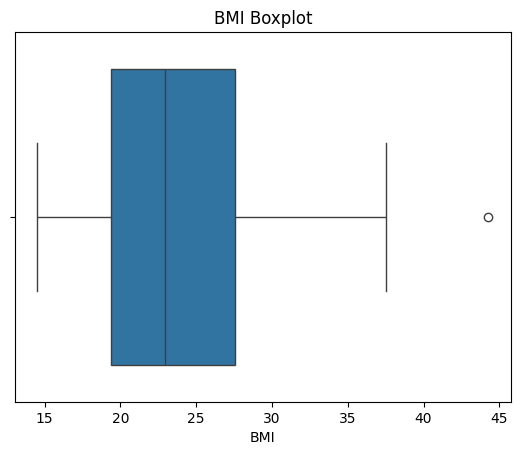

In [162]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to visualize outliers in BMI
sns.boxplot(x=df['BMI'])
plt.title("BMI Boxplot")
plt.show()


In [168]:
# Calculate the IQR (Interquartile Range) for BMI
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter rows where BMI is outside the bounds
outliers = df[(df['BMI'] < lower_bound) | (df['BMI'] > upper_bound)]

# Display the outliers
print("Outliers in BMI:")
print(outliers[['Height', 'Weight', 'BMI']])


Outliers in BMI:
     Height  Weight        BMI
56  0.40678     1.0  44.273908


In [169]:
# Remove rows where BMI is an outlier
df_no_outliers = df[(df['BMI'] >= lower_bound) & (df['BMI'] <= upper_bound)]

# Display the cleaned data
print("Data without outliers:")
print(df_no_outliers[['Height', 'Weight', 'BMI']].head())


Data without outliers:
     Height    Weight        BMI
0  0.457627  0.135714  18.053471
1  0.711864  0.707143  28.562737
2  0.237288  0.278571  26.282793
3  0.762712  0.278571  17.795918
4  0.508475  0.135714  17.382812


In [171]:
# Save the preprocessed food data to a new CSV file
df.to_csv("processed_user_data.csv", index=False)

print("User data preprocessed and saved successfully!")


User data preprocessed and saved successfully!


In [173]:
df.dtypes

,0
Age,float64
Weight,float64
Height,float64
Weekly spend for food,float64
Gender_Male,bool
...,...
Diet goal_Improve energy levels,bool
Diet goal_Manage health conditions,bool
Diet goal_Sustainable diet,bool
Diet goal_Weight management,bool
